# 3. Predicting Titanic Survival Using Logistic Regression

Importing the libraries

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

Loading the dataset

In [25]:
data = pd.read_csv('./datasets/titanic.csv')

In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Preprocessing

Fill missing ages with median

In [27]:
imputer = SimpleImputer(strategy='median')
data['Age'] = imputer.fit_transform(data[['Age']])

Fill missing embarked values with the most frequent value

In [28]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

Drop columns that won't be used for prediction

In [29]:
data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

Define categorical and numerical columns

In [30]:
categorical_cols = ['Sex', 'Embarked']
numerical_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Preprocessing pipeline for numerical data

In [31]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

Preprocessing pipeline for categorical data

In [32]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

Combine preprocessing steps

In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

Apply transformation to the data

In [35]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_preprocessed = preprocessor.fit_transform(X)

X_preprocessed_df = pd.DataFrame(X_preprocessed)

# Implement Logistic Regression

Split the dataset into training and testing sets

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

Train the logistic regression model

In [38]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Evaluate the Model

Predict probabilities on the test set

In [39]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

Calculate ROC-AUC

In [40]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC: {roc_auc:.2f}')

ROC-AUC: 0.88


Calculate accuracy

In [41]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81


Plot ROC curve

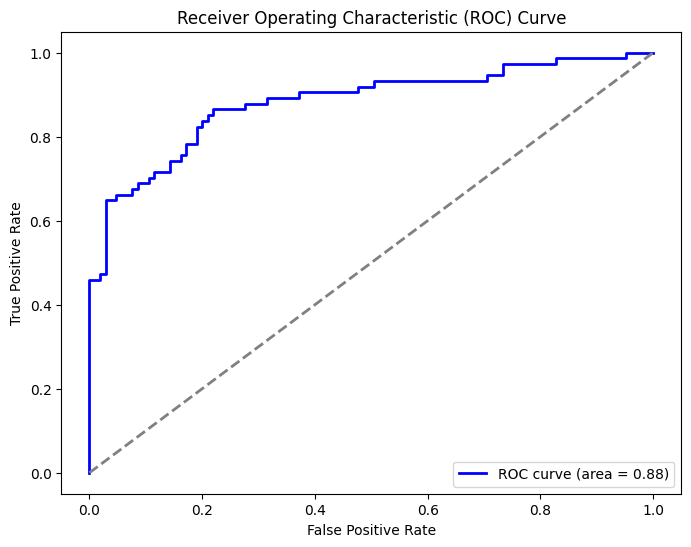

In [42]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()